<a href="https://colab.research.google.com/github/aliemadabdo/ML-Basics/blob/main/Lab6_task-malti_fearture_LR_with_NN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [139]:
#Import the required modules, numpy for calculation, and Matplotlib for drawing
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import csv
from keras.layers import Dense
from keras.models import Sequential
# import sklearn
from sklearn.model_selection import train_test_split


In [140]:
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data'

column_names = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model year', 'origin', 'car name']

raw_dataset = pd.read_csv(url, names=column_names,
                          na_values='?', comment='\t',
                          sep=' ', skipinitialspace=True)
raw_dataset.fillna(raw_dataset.mean(), inplace=True)

In [141]:
raw_dataset


,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,NaN
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,NaN
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,NaN
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,NaN
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,NaN
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790.0,15.6,82,1,NaN
394,44.0,4,97.0,52.0,2130.0,24.6,82,2,NaN
395,32.0,4,135.0,84.0,2295.0,11.6,82,1,NaN
396,28.0,4,120.0,79.0,2625.0,18.6,82,1,NaN


In [142]:
x = raw_dataset.iloc[:, 1:8] # Select all rows except the last and first one
y = raw_dataset.iloc[:, 0] # Select the first column
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)


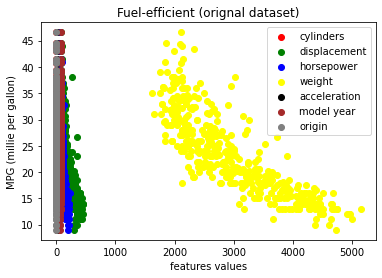

In [143]:
plt.scatter(x['cylinders'],    y ,label='cylinders',    color='red')
plt.scatter(x['displacement'], y ,label='displacement', color='green')
plt.scatter(x['horsepower'],   y ,label='horsepower',   color='blue')
plt.scatter(x['weight'],       y ,label='weight',       color='yellow')
plt.scatter(x['acceleration'], y ,label='acceleration', color='black')
plt.scatter(x['model year'],   y ,label='model year',   color='brown')
plt.scatter(x['origin'],       y ,label='origin',       color='gray')

plt.title('Fuel-efficient (orignal dataset)')
plt.xlabel('features values')
plt.ylabel('MPG (millie per gallon)')

plt.legend()
plt.show()


Text(0, 0.5, 'MPG (millie per gallon)')

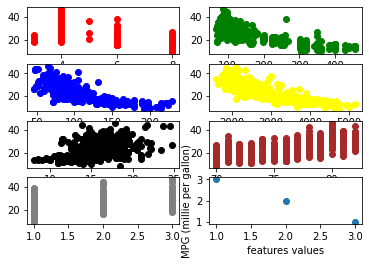

In [144]:
#Filltering (get the correlation between every input column (dimensions) and the output)
# Manually (from graphs)

plt.subplot(4,2,1)
plt.scatter(x['cylinders'],    y ,label='cylinders',    color='red')
plt.subplot(4,2,2)
plt.scatter(x['displacement'], y ,label='displacement', color='green') #highly correlated
plt.subplot(4,2,3)
plt.scatter(x['horsepower'],   y ,label='horsepower',   color='blue') #highly correlated
plt.subplot(4,2,4)
plt.scatter(x['weight'],       y ,label='weight',       color='yellow') #highly correlated
plt.subplot(4,2,5)
plt.scatter(x['acceleration'], y ,label='acceleration', color='black')
plt.subplot(4,2,6)
plt.scatter(x['model year'],   y ,label='model year',   color='brown')
plt.subplot(4,2,7)
plt.scatter(x['origin'],       y ,label='origin',       color='gray')
plt.subplot(4,2,8)
plt.scatter([1,2,3],[3,2,1])
plt.xlabel('features values')
plt.ylabel('MPG (millie per gallon)')


In [145]:
#Filltering (get the correlation between every input column (dimensions) and the output)
# using NumPy corrcoef(col,output)[0,1] as correlation matrix is 2*2 matrix [[1 r][r 1]]

#Power horse column r was nan so we checked on it using df.isan().sum() function
# and there were 6 missing values from power horse column so we fill them first 
# using df.fillna(df.mean(), inplace=True) 
print(raw_dataset.isna().sum())
raw_dataset.fillna(raw_dataset.mean(), inplace=True)
print(raw_dataset.isna().sum())

acceleration_correlation = abs(np.corrcoef(x['acceleration'], y)[0, 1])
cylinders_correlation    = abs(np.corrcoef(x['cylinders'],    y)[0, 1])
displacement_correlation = abs(np.corrcoef(x['displacement'], y)[0, 1])
horsepower_correlation   = abs(np.corrcoef(x['horsepower'],   y)[0, 1])
modelYear_correlation    = abs(np.corrcoef(x['model year'],   y)[0, 1])
origin_correlation       = abs(np.corrcoef(x['origin'],       y)[0, 1])
weight_correlation       = abs(np.corrcoef(x['weight'],       y)[0, 1])

correlationDict = {'acceleration':acceleration_correlation,
                   'cylinders'   :cylinders_correlation,
                   'origin'      :origin_correlation,
                   'model year'  :modelYear_correlation,
                   'displacement':displacement_correlation,
                   'weight'      :weight_correlation,
                   'horsepower'  :horsepower_correlation}
                   
sortedCoDict = sorted(correlationDict.items(), key=lambda x: x[1])
print('\nsorted correlation coeffitions : ')
sortedCoDict


mpg               0
cylinders         0
displacement      0
horsepower        0
weight            0
acceleration      0
model year        0
origin            0
car name        398
dtype: int64
mpg               0
cylinders         0
displacement      0
horsepower        0
weight            0
acceleration      0
model year        0
origin            0
car name        398
dtype: int64

sorted correlation coeffitions : 


[('acceleration', 0.42028891210165065),
 ('origin', 0.5634503597738428),
 ('model year', 0.5792671330833096),
 ('horsepower', 0.7714371350025522),
 ('cylinders', 0.7753962854205543),
 ('displacement', 0.8042028248058979),
 ('weight', 0.8317409332443352)]

In [146]:
#from previous output we will only use wight, dispalcement and cylinders
# not horse power just for change
x = raw_dataset.loc[:,['weight','displacement','cylinders']] # Select all rows except the last and first one

In [147]:
print(x)
print(y)

     weight  displacement  cylinders
0    3504.0         307.0          8
1    3693.0         350.0          8
2    3436.0         318.0          8
3    3433.0         304.0          8
4    3449.0         302.0          8
..      ...           ...        ...
393  2790.0         140.0          4
394  2130.0          97.0          4
395  2295.0         135.0          4
396  2625.0         120.0          4
397  2720.0         119.0          4

[398 rows x 3 columns]
0      18.0
1      15.0
2      18.0
3      16.0
4      17.0
       ... 
393    27.0
394    44.0
395    32.0
396    28.0
397    31.0
Name: mpg, Length: 398, dtype: float64


In [148]:
# Data normallization
#weight	displacement	cylinders
y = y/max(y)
x['cylinders'] = x['cylinders']/max(x['cylinders'])
x['weight'] = x['weight']/max(x['weight'])
x['displacement'] = x['displacement']/max(x['displacement'])

In [149]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [150]:
print(x)
print(y)

       weight  displacement  cylinders
0    0.681712      0.674725        1.0
1    0.718482      0.769231        1.0
2    0.668482      0.698901        1.0
3    0.667899      0.668132        1.0
4    0.671012      0.663736        1.0
..        ...           ...        ...
393  0.542802      0.307692        0.5
394  0.414397      0.213187        0.5
395  0.446498      0.296703        0.5
396  0.510700      0.263736        0.5
397  0.529183      0.261538        0.5

[398 rows x 3 columns]
0      0.386266
1      0.321888
2      0.386266
3      0.343348
4      0.364807
         ...   
393    0.579399
394    0.944206
395    0.686695
396    0.600858
397    0.665236
Name: mpg, Length: 398, dtype: float64


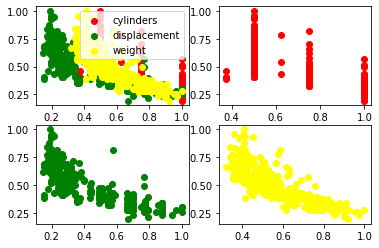

In [151]:
plt.subplot(2,2,1)
plt.scatter(x_train['cylinders'],    y_train ,label='cylinders',    color='red')
plt.scatter(x_train['displacement'], y_train ,label='displacement', color='green') #highly correlated
plt.scatter(x_train['weight'],       y_train ,label='weight',       color='yellow') #highly correlated
plt.legend()

plt.subplot(2,2,2)
plt.scatter(x_train['cylinders'],    y_train , color='red')
plt.subplot(2,2,3)
plt.scatter(x_train['displacement'], y_train , color='green') #highly correlated
plt.subplot(2,2,4)
plt.scatter(x_train['weight'],       y_train , color='yellow') #highly correlated

# plt.xlabel('features values')
# plt.ylabel('MPG (millie per gallon)')
plt.show()

In [152]:
#The basic linear regression model is wx+ b, and since this is a two-dimensional space, the model is ax+ b
def model(a0,a1,a2, b, x_train): 
  return a0*x_train['cylinders'] + a1*x_train['displacement'] + a2*x_train['weight'] + b

#The most commonly used loss function of linear regression model is the loss function of mean variance difference 
def loss_function(a0,a1,a2, b, x_train, y_train): 
  num = len(x_train['cylinders']) 
  #print(f"befor model fn {a}") 
  prediction=model(a0,a1,a2,b,x_train) 
  #print(f"after model fn {a}") 
  return (0.5/num) * (np.square(prediction-y_train)).sum()
#The optimization function mainly USES partial derivatives to update two parameters a and b 

def optimize(a0,a1,a2,b,x_train,y_train): 
  num = len(x['cylinders']) 
  prediction = model(a0,a1,a2,b,x_train) 
  #Update the values of A and B by finding the partial derivatives of the loss function on a and b 
  da0 = (1.0/num) * ((prediction -y_train)*x_train['cylinders']).sum() 
  da1 = (1.0/num) * ((prediction -y_train)*x_train['displacement']).sum() 
  da2 = (1.0/num) * ((prediction -y_train)*x_train['weight']).sum() 
  db = (1.0/num) * ((prediction -y_train).sum())
  plt.show()
  #print(f"befor equation fn {a}") 
  a0 = a0 -Lr*da0
  a1 = a1 -Lr*da1
  a2 = a2 -Lr*da2 
  #print(f"after equation fn {a}") 
  b = b -Lr*db 
  return a0,a1,a2, b

#iterated function, return a and b 
def iterate(a0,a1,a2,b,x_train,y_train,times): 
  for i in range(0,times):
    a0,a1,a2,b = optimize(a0,a1,a2,b,x_train,y_train)
  return a0,a1,a2, b 

In [153]:

#Initialize parameters and display 
a0 = np.random.rand(1)
a1 = np.random.rand(1)
a2 = np.random.rand(1)

#print(a) 
b = np.random.rand(1) 
#print(b) 
Lr = 0.01

a0,a1,a2,b = iterate(a0,a1,a2,b,x_train,y_train,10000) 
prediction=model(a0,a1,a2,b,x_train) 
loss = loss_function(a0,a1,a2, b, x_train, y_train) 


In [154]:
model = Sequential()
model.add(Dense(1, input_dim=3,activation='linear'))
# 1 --> nimber of nerons 

model.compile(loss='mse',optimizer='sgd',metrics='mae') 
# sgd : stocatic gradiant 
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 1)                 4         
                                                                 
Total params: 4
Trainable params: 4
Non-trainable params: 0
_________________________________________________________________


In [155]:
result = model.fit(x_train,y_train,batch_size=8,epochs=100,verbose=1) 
# epoch = itirations on data

# defult batch size = 32 ================================== mini batch
# output 4/4 which means update done 4 times (30/8) ======= mini batch


Epoch 1/100
40/40 [==============================] - 0s 1ms/step - loss: 0.1184 - mae: 0.2795
Epoch 2/100
40/40 [==============================] - 0s 1ms/step - loss: 0.0806 - mae: 0.2431
Epoch 3/100
40/40 [==============================] - 0s 2ms/step - loss: 0.0731 - mae: 0.2296
Epoch 4/100
40/40 [==============================] - 0s 2ms/step - loss: 0.0676 - mae: 0.2196
Epoch 5/100
40/40 [==============================] - 0s 1ms/step - loss: 0.0625 - mae: 0.2103
Epoch 6/100
40/40 [==============================] - 0s 2ms/step - loss: 0.0581 - mae: 0.2027
Epoch 7/100
40/40 [==============================] - 0s 1ms/step - loss: 0.0540 - mae: 0.1936
Epoch 8/100
40/40 [==============================] - 0s 2ms/step - loss: 0.0502 - mae: 0.1865
Epoch 9/100
40/40 [==============================] - 0s 1ms/step - loss: 0.0470 - mae: 0.1800
Epoch 10/100
40/40 [==============================] - 0s 2ms/step - loss: 0.0439 - mae: 0.1728
Epoch 11/100
40/40 [==============================] - 0s 1m

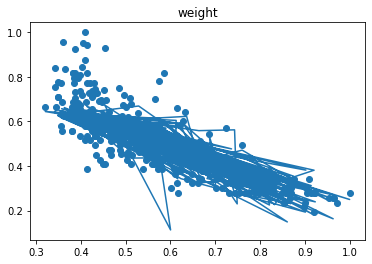

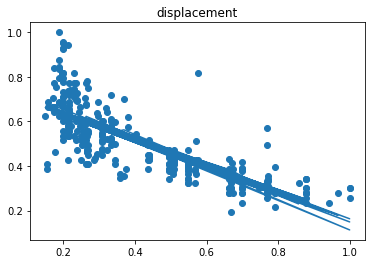

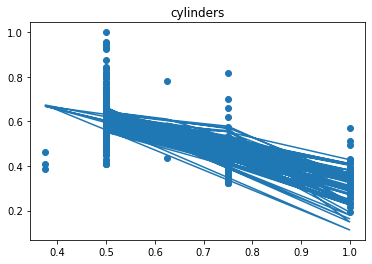

In [159]:


plt.scatter(x_train['weight'],y_train)
plt.plot(x_train['weight'],prediction)
plt.title('weight')
plt.show()
plt.scatter(x_train['displacement'],y_train)
plt.plot(x_train['displacement'],prediction)
plt.title('displacement')
plt.show()
plt.scatter(x_train['cylinders'],y_train)
plt.plot(x_train['cylinders'],prediction)
plt.title('cylinders')

plt.show()



In [157]:
print(prediction)
print(y_train)

64     0.344562
55     0.618319
317    0.627798
102    0.621425
358    0.605701
         ...   
323    0.556799
192    0.428359
117    0.662156
47     0.426458
172    0.639103
Length: 318, dtype: float64
64     0.321888
55     0.579399
317    0.736052
102    0.557940
358    0.678112
         ...   
323    0.598712
192    0.472103
117    0.622318
47     0.407725
172    0.536481
Name: mpg, Length: 318, dtype: float64


In [157]:
#try to plot error graph